In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
# start = '2015-01-01'
# end = '2024-12-31'

# df = data.DataReader('AAPL' , 'yahoo' , start , end)
# df.head()

import yfinance as yf

# Define the start and end dates
start = '2015-01-01'
end = '2023-12-31'

# Download data for both Apple and Yahoo
tickers = ['AAPL']
df = yf.download(tickers, start=start, end=end)

# Display the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.402176  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.714727  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.716953  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.049520  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.973555  237458000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714727,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049520,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000


In [5]:
df = df.drop(['Date' , 'Adj Close'] , axis=1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


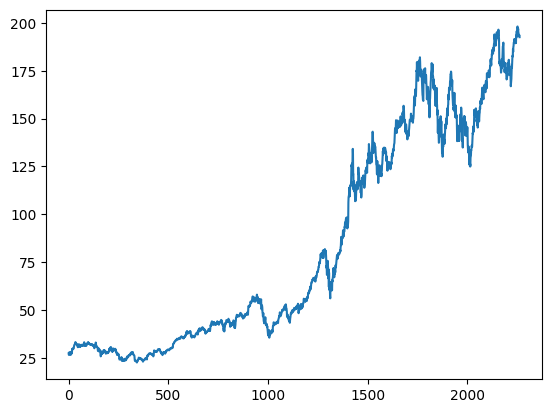

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2259,195.179993,195.410004,192.970001,193.600006,37122800
2260,193.610001,193.889999,192.830002,193.050003,28919300
2261,192.490005,193.500000,191.089996,193.149994,48087700
2262,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    181.768301
2260    181.787101
2261    181.898701
2262    182.046001
2263    182.173301
Name: Close, Length: 2264, dtype: float64

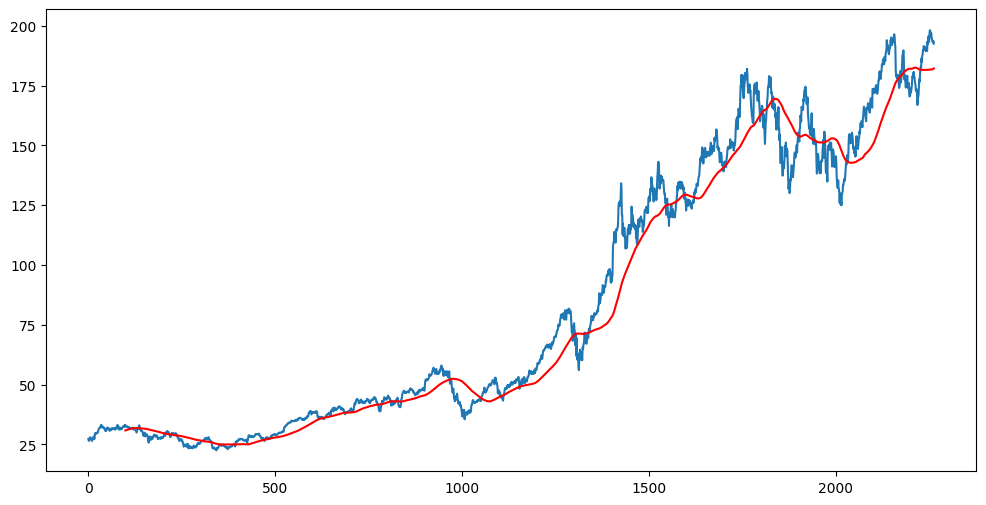

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    178.649100
2260    178.871851
2261    179.085250
2262    179.290201
2263    179.487900
Name: Close, Length: 2264, dtype: float64

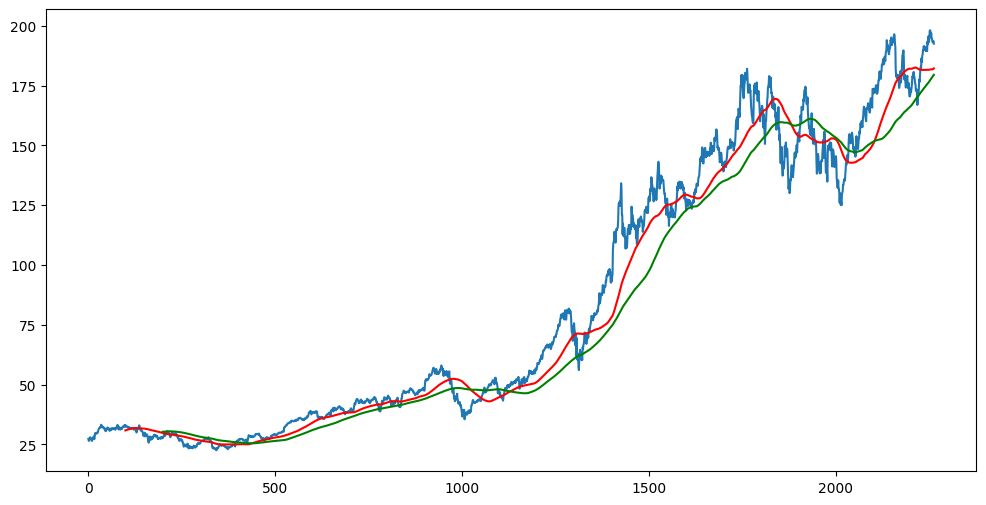

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [12]:
df.shape

(2264, 5)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1584, 1)
(680, 1)


In [14]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [15]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.92817746],
       [0.92535766],
       [0.93099725]])

In [18]:
data_training_array.shape

(1584, 1)

In [19]:
x_train = []
y_train = []

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i , 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [20]:
x_train.shape

(1484, 100, 1)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense , Dropout , LSTM ,Input
from keras.models import Sequential

In [23]:
# Building the LSTM model
model = Sequential()

# Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# LSTM layers with dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Activation Function: Using 'relu' as the activation function in LSTM layers is unconventional. Typically, tanh is used for the activation function in LSTM cells, while relu is not recommended.

In [24]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dropout, Dense, Input

# # Building the LSTM model
# model = Sequential()

# # Input layer
# model.add(Input(shape=(x_train.shape[1], 1)))

# # LSTM layers
# model.add(LSTM(units=50, activation='tanh', return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=60, activation='tanh', return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(units=80, activation='tanh', return_sequences=True))
# model.add(Dropout(0.4))

# model.add(LSTM(units=120, activation='tanh'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Model summary
# model.summary()


In [25]:
model.compile(optimizer ='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - loss: 0.0710
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0049
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0056
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0047
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0042
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0042
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0046
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0032
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0051
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0045
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0044
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0043
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0033
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0034
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - l

In [26]:
model.save('my_model.keras')

In [27]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [28]:
data_testing.tail(100)

,Close
2164,178.190002
2165,177.970001
2166,177.789993
2167,179.460007
2168,177.449997
...,...
2259,193.600006
2260,193.050003
2261,193.149994
2262,193.580002


In [29]:
past_100_days = data_training.tail(100)

In [30]:
# Concatenating DataFrames

# final_df = past_100_days.append(data_testing , ignore_index=True)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [31]:
final_df.head()

,Close
0,113.849998
1,115.169998
2,116.029999
3,116.589996
4,119.050003


In [32]:
input_data = scaler.fit_transform(final_df)

In [33]:
input_data.shape

(780, 1)

In [34]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i , 0])

In [35]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [36]:
# Making Predictions

y_predicted = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [37]:
y_predicted.shape

(680, 1)

In [38]:
y_test

array([0.22857823, 0.23320675, 0.21469266, 0.24293862, 0.24768576,
       0.24376929, 0.23415622, 0.23296934, 0.20899606, 0.22181337,
       0.16615238, 0.16911948, 0.18858304, 0.19416102, 0.15428435,
       0.14312847, 0.10586278, 0.1319725 , 0.16140515, 0.14740088,
       0.1305483 , 0.12864946, 0.15974364, 0.13743178, 0.15725136,
       0.15487779, 0.15428435, 0.13565155, 0.1277    , 0.12378353,
       0.13304057, 0.11500121, 0.14289106, 0.14300976, 0.15297886,
       0.15760739, 0.14550204, 0.16021837, 0.19736526, 0.18739616,
       0.19344879, 0.21291235, 0.19712803, 0.21896516, 0.23890336,
       0.23558032, 0.23213867, 0.22857823, 0.24839781, 0.26679329,
       0.27427021, 0.27794927, 0.30987429, 0.3343224 , 0.3645859 ,
       0.3488014 , 0.37099456, 0.36375505, 0.3772846 , 0.41894131,
       0.41098975, 0.38618562, 0.33942556, 0.38333723, 0.3744362 ,
       0.39105155, 0.41193921, 0.41704256, 0.39069553, 0.36945166,
       0.3772846 , 0.37989558, 0.37586049, 0.39769762, 0.39283

In [39]:
y_predicted

array([[0.16407381],
       [0.16986944],
       [0.17596664],
       [0.18282788],
       [0.19047284],
       [0.19850416],
       [0.20672317],
       [0.21449433],
       [0.22146343],
       [0.22730589],
       [0.23171815],
       [0.23423672],
       [0.23472632],
       [0.23329706],
       [0.23047689],
       [0.22641927],
       [0.22120133],
       [0.21530166],
       [0.20933136],
       [0.20348388],
       [0.19798344],
       [0.19294867],
       [0.18836388],
       [0.18424305],
       [0.1806784 ],
       [0.1777317 ],
       [0.17542347],
       [0.17371394],
       [0.17248845],
       [0.17159313],
       [0.17087613],
       [0.1702431 ],
       [0.16959472],
       [0.16893303],
       [0.16829766],
       [0.16776061],
       [0.16739671],
       [0.16722241],
       [0.16726261],
       [0.16763724],
       [0.16841727],
       [0.16963163],
       [0.1713112 ],
       [0.17345569],
       [0.17594124],
       [0.1788261 ],
       [0.18229152],
       [0.186

In [40]:
scaler.scale_

array([0.01186803])

In [41]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

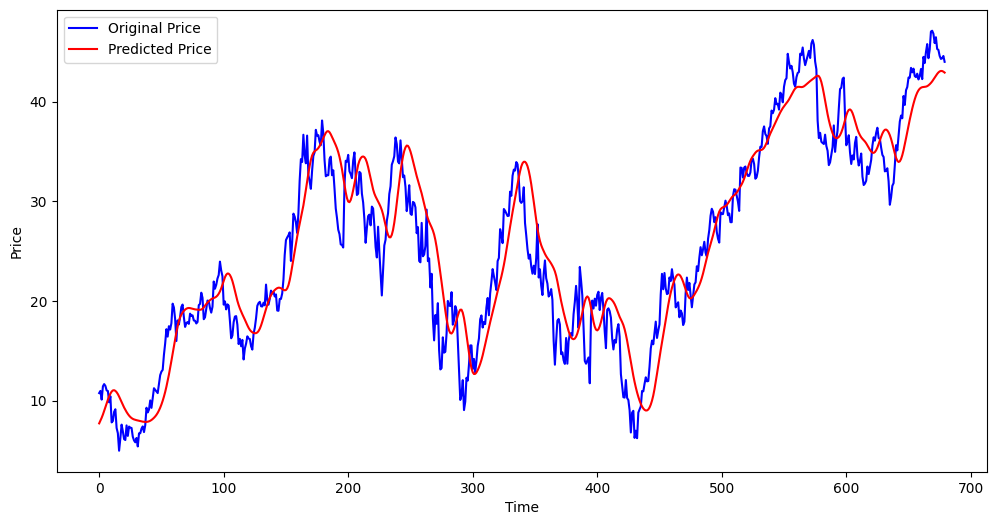

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = 'Original Price' )
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()